In [1]:
import wntr
import matplotlib.pyplot as plt
import seaborn as sns
from epyt import epanet

In [2]:
inp_file='Net3.inp'

In [3]:
wn=wntr.network.WaterNetworkModel(inp_file)

In [4]:
wn.options.time.duration=7*24*60*60
wn.options.time.hydraulic_timestep=3600
wn.options.time.quality_timestep=3600
wn.options.quality.parameter='AGE'

In [5]:
sim=wntr.sim.EpanetSimulator(wn)
results=sim.run_sim()

In [6]:
water_age=results.node['quality']

In [7]:
population=wntr.metrics.population(wn)

In [8]:
junctionsWithpopulation=population[population>0].index

In [9]:
junctionsWithpopulation

Index(['15', '35', '101', '103', '105', '107', '109', '111', '113', '115',
       '117', '119', '121', '123', '125', '127', '131', '139', '141', '143',
       '145', '147', '149', '151', '153', '157', '159', '161', '163', '166',
       '167', '171', '177', '185', '189', '191', '193', '197', '199', '201',
       '203', '205', '207', '209', '211', '213', '215', '217', '219', '225',
       '229', '231', '237', '239', '243', '247', '251', '253', '255'],
      dtype='object')

In [10]:
waterAgewithPopulation=water_age[junctionsWithpopulation]

In [11]:
waterAgewithPopulation.describe()

name,15,35,101,103,105,107,109,111,113,115,...,225,229,231,237,239,243,247,251,253,255
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,69338.906250,30605.210938,27120.923828,31719.109375,25678.373047,31144.271484,36696.093750,27462.515625,29187.820312,24990.673828,...,86530.453125,42237.921875,79513.914062,39792.125000,40173.171875,172177.968750,51337.101562,66956.789062,85588.945312,80044.234375
std,64186.980469,23247.609375,19721.380859,19918.218750,20372.062500,19134.710938,17167.015625,19733.076172,19927.183594,20495.345703,...,27227.630859,17276.646484,24633.236328,17420.814453,16530.794922,63263.906250,42692.671875,61349.121094,85032.125000,86547.914062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27030.099609,13135.531250,14174.373047,18943.154297,12040.366211,18269.947266,27416.955078,13517.525391,15187.091797,10938.701172,...,78191.046875,33182.664062,72479.789062,30376.259766,30813.976562,151199.937500,32666.968750,38966.074219,45962.105469,39457.945312
50%,51623.742188,19055.148438,18342.671875,25124.857422,16042.926758,25278.726562,35864.648438,19811.607422,20653.812500,14813.434570,...,84137.820312,38963.339844,78465.468750,35827.378906,36336.578125,197551.609375,37759.582031,44700.164062,52503.355469,46762.351562
75%,72424.125000,38955.382812,37044.890625,42296.605469,34067.191406,43497.617188,50679.871094,38675.609375,39016.109375,33136.753906,...,101025.289062,46033.226562,87107.539062,45965.214844,45403.050781,206496.703125,49947.867188,58551.613281,79783.671875,64580.003906
max,335845.031250,108979.562500,87440.609375,91634.226562,86220.929688,90857.898438,84166.960938,86217.531250,86525.992188,85553.914062,...,151353.484375,108977.851562,148577.859375,111621.539062,101061.148438,257984.109375,303438.468750,339585.437500,392428.468750,389034.187500


<Axes: xlabel='name'>

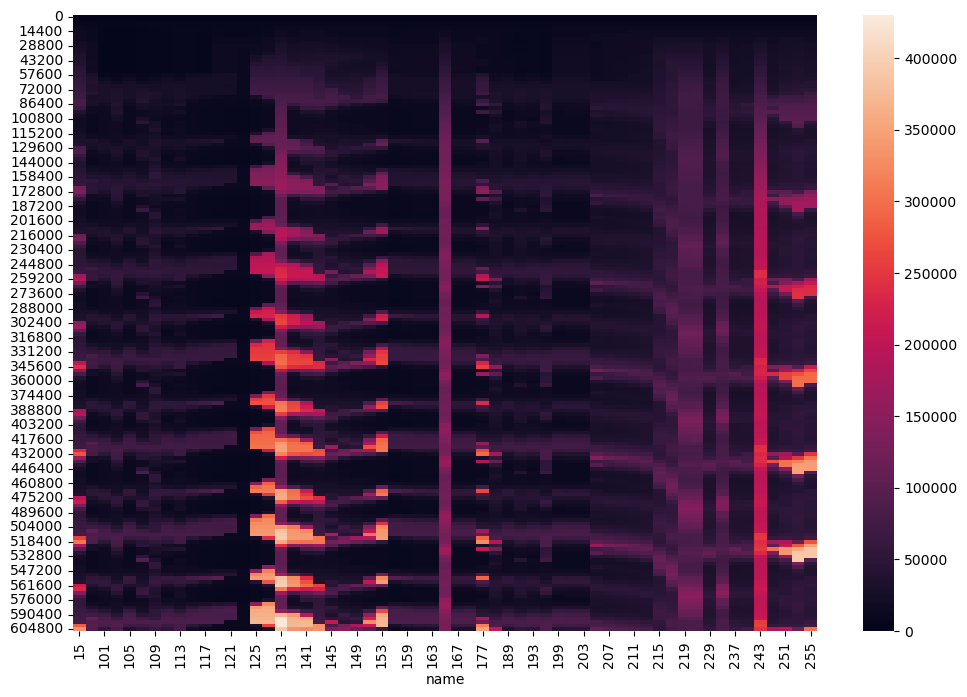

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(waterAgewithPopulation)

In [13]:
waterAgewithPopulation

name,15,35,101,103,105,107,109,111,113,115,...,225,229,231,237,239,243,247,251,253,255
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3600,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,...,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
7200,7200.000000,7199.923828,6557.252930,6639.071777,6688.229980,6866.557129,6881.380371,6984.286621,7058.163574,7061.953125,...,7199.917969,7198.487305,7199.784180,7197.637207,7198.213379,7199.939453,7199.663086,7200.000000,7200.000000,7200.000000
10800,10791.067383,10024.715820,3381.946045,4275.486816,4707.805176,6675.838867,6852.062012,7866.411133,8710.473633,8610.930664,...,10799.833008,10767.700195,10796.209961,10719.929688,10728.060547,10799.939453,10741.935547,10800.000000,10791.015625,10782.573242
14400,14025.489258,11595.383789,3404.786133,3879.562256,4108.806641,5596.763184,5615.459961,7166.883789,8576.810547,8448.400391,...,14399.741211,14126.495117,14396.209961,13871.871094,13915.918945,14399.939453,13991.452148,14344.605469,14383.640625,14234.909180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590400,67608.375000,72336.132812,69261.242188,44947.054688,80304.328125,45662.734375,53661.472656,78857.765625,71031.742188,80033.859375,...,113184.523438,39602.058594,75092.984375,37173.136719,37742.324219,208646.953125,38876.964844,45934.339844,54200.886719,44669.371094
594000,71208.375000,108979.562500,84319.492188,66275.093750,85819.937500,70332.601562,61232.203125,83754.945312,81185.039062,83798.242188,...,94929.781250,42650.144531,77570.226562,40655.582031,40717.671875,212132.468750,41705.449219,47596.054688,52252.492188,50020.238281
597600,74808.375000,91266.164062,87440.609375,87919.492188,86220.929688,87504.328125,84166.960938,86217.531250,86525.992188,85553.914062,...,82708.460938,43941.917969,80440.296875,48068.613281,44255.582031,254828.515625,45702.871094,53158.285156,53620.238281,61225.898438
601200,282173.687500,96344.531250,82762.140625,91634.226562,68123.429688,70753.679688,81520.171875,65569.000000,81380.718750,51193.046875,...,84021.359375,49087.542969,81821.421875,52142.984375,48506.738281,257984.109375,58491.882812,63090.402344,61298.375000,72389.742188


In [14]:
avg_water_age=waterAgewithPopulation.mean(axis=1)

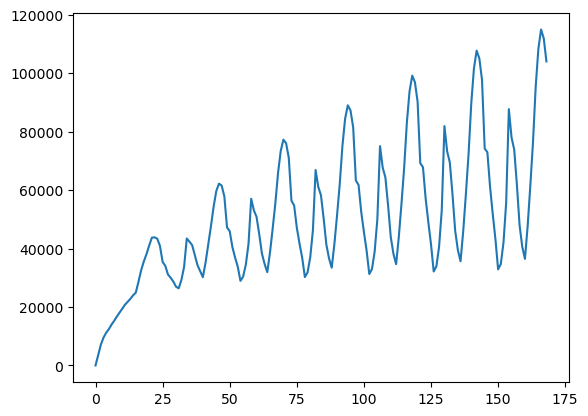

In [15]:
plt.plot(avg_water_age.index/3600,avg_water_age,label='Average Water Age')

In [16]:
threshold=48
meanWaterAge=waterAgewithPopulation.mean(axis=0)
problematicJunc=meanWaterAge[meanWaterAge>threshold].index

In [17]:
for junction in problematicJunc:
    junc=wn.get_node(junction)
    junc.add_demand(0.1,'Flushing')

In [20]:

water_age_after_strategies=results.node['quality'][junctionsWithpopulation]
avg_water_age_after_strategies=water_age_after_strategies.mean(axis=1)

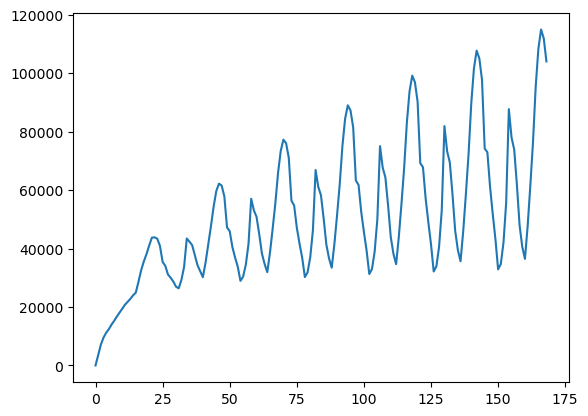

In [22]:
plt.plot(avg_water_age_after_strategies.index/3600,avg_water_age_after_strategies,label='Average Water Age')